<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Отток-клиентов-банка" data-toc-modified-id="Отток-клиентов-банка-1">Отток клиентов банка</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2">Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3">Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4">Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5">Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6">Общий вывод</a></span></li></ul></div>

# Отток клиентов банка

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Необходимо построить модель с предельно большим значением *F1*-меры, нужно довести метрику до 0.59.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# Подготовка данных

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None

In [2]:
try:
    data = pd.read_csv('/datasets/Churn.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')

In [3]:
def information_df(metod):
    print('Ознакомимся с таблицей, для этого выведем первые 20 строк датафрейма data на экран.')
    display(metod.head(21))
    print(' ')    
    print('Выведем основную информацию о датафрейме с помощью метода info().')
    display(metod.info())
    print(' ')
    print ('Количество явных дубликатов:', metod.duplicated().sum())
    print(' ')
    print('Ознакомимся с первоначальными данными методом describe().')
    plt.show()
    display(metod.describe())
      
information_df(data)

Ознакомимся с таблицей, для этого выведем первые 20 строк датафрейма data на экран.


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


 
Выведем основную информацию о датафрейме с помощью метода info().
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

 
Количество явных дубликатов: 0
 
Ознакомимся с первоначальными данными методом describe().


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Рассмотрим количество пропусков.

In [4]:
data.isna().mean()

RowNumber          0.0000
CustomerId         0.0000
Surname            0.0000
CreditScore        0.0000
Geography          0.0000
Gender             0.0000
Age                0.0000
Tenure             0.0909
Balance            0.0000
NumOfProducts      0.0000
HasCrCard          0.0000
IsActiveMember     0.0000
EstimatedSalary    0.0000
Exited             0.0000
dtype: float64

Заменим пропуски в столбце 'Tenure' нулевым значением.

In [5]:
data['Tenure'] = data['Tenure'].fillna(0)

Удалим неинформативные признаки

In [6]:
data = data.drop(['RowNumber','CustomerId','Surname'], axis=1)

Чтобы не попасть в дамми-ловушку, воспользуемся функцией pd.get_dummies().

In [7]:
data = pd.get_dummies(data, drop_first=True)

**При подготовке данных были выполнены следующие действия:**
- Ознакомились с датафреймом
- Проверили данные на дубликаты
- Найдены и заменены нулевым значением пропуски в столбце 'Tenure'
- Чтобы не попасть в дамми-ловушку, воспользовались функцией pd.get_dummies().

# Исследование задачи

Разделим данные на признаки и целевой признак.

In [8]:
features = data.drop('Exited', axis=1)
target = data['Exited']


Разделим данные на обучающую, валидационную и тестовую выборки.

In [9]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.3,
                                                                              random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5,
                                                                            random_state=12345)
print(features_train.shape, features_valid.shape, features_test.shape)
print(target_train.shape, target_valid.shape, target_test.shape)

(7000, 11) (1500, 11) (1500, 11)
(7000,) (1500,) (1500,)


Масштабируем данные

In [10]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Рассмотрим дисбаланс классов.

In [11]:
target.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Обучим модель логистической регрессии с дисбалансом классов

In [12]:
model =  LogisticRegression(random_state=12345, max_iter= 1000 )
model.fit(features_train, target_train)
prediction_valid = model.predict(features_valid)
f1 = f1_score(target_valid, prediction_valid)
print(f"Логистическая регрессия: F1-мера - {f1}")

Логистическая регрессия: F1-мера - 0.323943661971831


Обучим модель дерева решений с дисбалансом классов

In [13]:
best_model_tree = None
best_result_tree = 0
best_depth_tree = 0
for depth in range(1,50):
    model = DecisionTreeClassifier(random_state = 12345, max_depth = depth)
    model.fit(features_train, target_train)
    prediction_valid = model.predict(features_valid)
    result = f1_score(prediction_valid, target_valid)
    if result > best_result_tree:
            best_model_tree = model
            best_result_tree = result
            best_depth_tree = depth
            
print(f"Дерево решений: F1-мера - {best_result_tree}, Максимальная глубина - {best_depth_tree}")

Дерево решений: F1-мера - 0.5645756457564577, Максимальная глубина - 10


Обучим модель случайного леса с дисбалансом классов.

In [14]:
best_model_forest = None
best_result_forest = 0
best_depth_forest = 0
for est in range(1, 50):
    for depth in range(1,11):
        model = RandomForestClassifier(random_state = 12345, n_estimators = est, max_depth = depth)
        model.fit(features_train, target_train)
        prediction_valid = model.predict(features_valid)
        result = f1_score(prediction_valid, target_valid)
        if  result > best_result_forest:
            best_model_forest = model
            best_result_forest = result
            best_est_forest = est
            best_depth_forest = depth
            
print(f"Случайный лес: F1-мера - {best_result_forest}, Количество деревьев - {best_est_forest}, \
Максимальная глубина - {best_depth_forest}")

Случайный лес: F1-мера - 0.5867768595041322, Количество деревьев - 14, Максимальная глубина - 9


Рассчитаем значение AUC-ROC и выведем ROC-кривую для логистической регрессии, дерева решений и случайного леса с дисбалансом классов.  

Логистическая регрессия: AUC-ROC - 0.7751323545874276
Дерево решений: AUC-ROC - 0.7714941392651486
Случайный лес: AUC-ROC - 0.8464441052720675


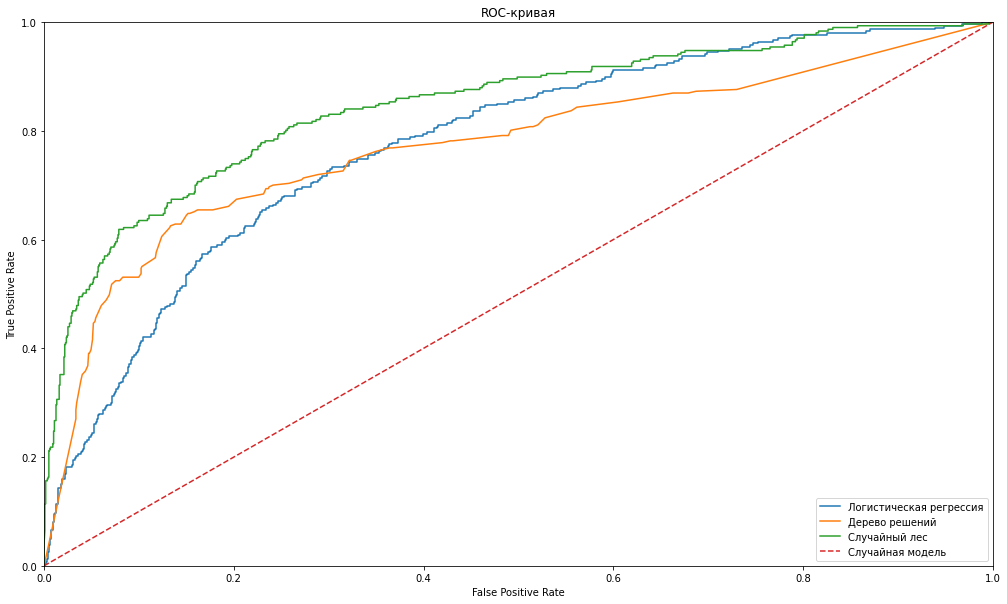

In [15]:
plt.figure(figsize=[17,10])

model = LogisticRegression(random_state=12345, solver = 'liblinear', max_iter= 1000 )
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f"Логистическая регрессия: AUC-ROC - {auc_roc}")
plt.plot(fpr, tpr, label='Логистическая регрессия')

model = DecisionTreeClassifier(random_state = 12345, max_depth = 10)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f"Дерево решений: AUC-ROC - {auc_roc}")
plt.plot(fpr, tpr, label='Дерево решений')

model = RandomForestClassifier(random_state = 12345, n_estimators = 14, max_depth = 9)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f"Случайный лес: AUC-ROC - {auc_roc}")
plt.plot(fpr, tpr, label='Случайный лес')

plt.plot([0, 1], [0, 1], linestyle='--', label='Случайная модель')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.title("ROC-кривая")
plt.show()

**При исследовании задачи были выполнены следующие действия:**
- Разделены данные на обучающую, валидационную и тестовую выборки
- Был обнаружен дисбаланс классов в отношении 4:1
- Обучили модели логистической регрессии, дерева решений, случайного леса с дисбалансом классов
- Нашли наилучшее значение F1-меры в моделях логистической регрессии(F1-мера - 0.09014084507042254), дерева решений(F1-мера - 0.5645756457564577), случайного леса(F1-мера - 0.5867768595041322) с дисбалансом классов
- Рассчитали значения AUC-ROC для логистической регрессии(AUC-ROC - 0.678176987912661), дерева решений(AUC-ROC - 0.7714941392651486), случайного леса(AUC-ROC - 0.8463021261375396) с дисбалансом классов.Наилучший показатель у случайного леса.
- Построили ROC-кривую для логистической регрессии, дерева решений и случайного леса с дисбалансом классов. Наилучшая ROC-кривая у случайного леса.

# Борьба с дисбалансом

Воспользуемся техникой upsampling для борьбы с дисбалансом

In [16]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, repeat=4)

print(target_upsampled.value_counts())

1    5644
0    5589
Name: Exited, dtype: int64


Рассмотрим модели логистической регрессии, дерева решений, случайного леса с обработанными данными техникой upsampling.

In [17]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
print(f"Логистическая регрессия: F1-мера - {f1}")

model = DecisionTreeClassifier(random_state=12345, max_depth=10)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
print(f"Дерево решений: F1-мера - {f1}")

model = RandomForestClassifier(random_state = 12345, n_estimators = 14, max_depth = 9)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
print(f"Случайный лес: F1-мера - {f1}")

Логистическая регрессия: F1-мера - 0.5016797312430011
Дерево решений: F1-мера - 0.5272969374167775
Случайный лес: F1-мера - 0.6116642958748222


Воспользуемся техникой downsampling для борьбы с дисбалансом

In [18]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, fraction=0.25)

print(target_downsampled.value_counts())

1    1411
0    1397
Name: Exited, dtype: int64


Рассмотрим модели логистической регрессии, дерева решений, случайного леса с обработанными данными техникой downsampling.

In [19]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
print(f"Логистическая регрессия: F1-мера - {f1}")

model = DecisionTreeClassifier(random_state=12345, max_depth=10)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
print(f"Дерево решений: F1-мера - {f1}")

model = RandomForestClassifier(random_state = 12345, n_estimators = 14, max_depth = 9)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
print(f"Случайный лес: F1-мера - {f1}")

Логистическая регрессия: F1-мера - 0.4977578475336324
Дерево решений: F1-мера - 0.5050732807215333
Случайный лес: F1-мера - 0.5732323232323232


Рассмотрим модели логистической регрессии, дерева решений, случайного леса с применением параметра class_weight для борьбы с дисбалансом.

In [20]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
print(f"Логистическая регрессия: F1-мера - {f1}")

model = DecisionTreeClassifier(random_state=12345, max_depth=10, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
print(f"Дерево решений: F1-мера - {f1}")

model = RandomForestClassifier(random_state = 12345, n_estimators = 14, max_depth = 9, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
print(f"Случайный лес: F1-мера - {f1}")

Логистическая регрессия: F1-мера - 0.5050732807215333
Дерево решений: F1-мера - 0.5220883534136546
Случайный лес: F1-мера - 0.6389301634472512


Рассчитаем значение AUC-ROC и выведем ROC-кривую для логистической регрессии, дерева решений, случайного леса. Для логистической регрессии случайного леса будем использовать данные с применением параметра class_weight.Для дерева решений будем использоваться данные с применением техники upsampling.

Логистическая регрессия: AUC-ROC - 0.7792060636011915
Дерево решений: AUC-ROC - 0.7610040655179098
Случайный лес: AUC-ROC - 0.8490980229405517


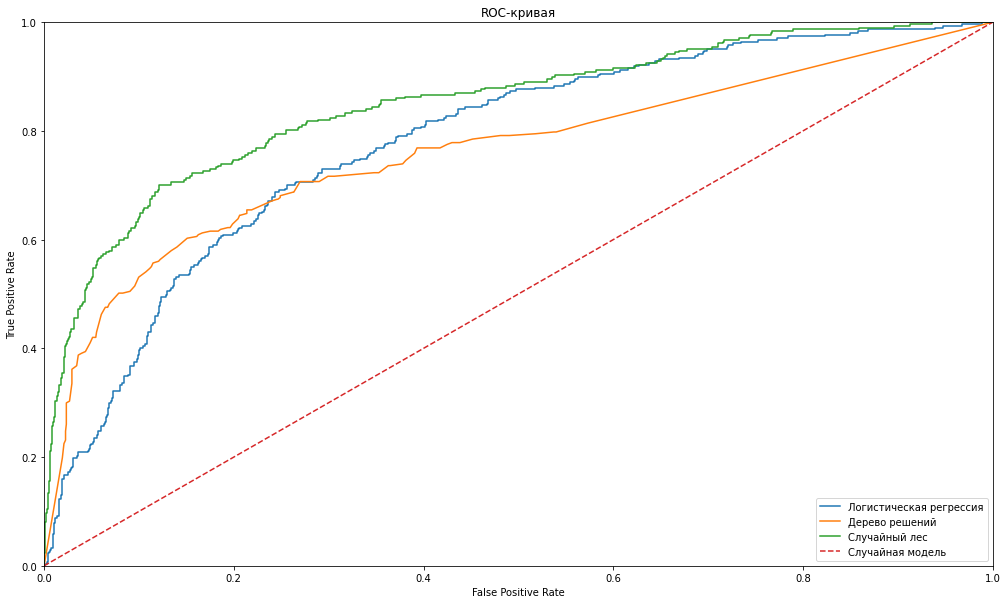

In [21]:
plt.figure(figsize=[17,10])

model = LogisticRegression(random_state=12345, solver = 'liblinear', class_weight='balanced', max_iter= 1000)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f"Логистическая регрессия: AUC-ROC - {auc_roc}")
plt.plot(fpr, tpr, label='Логистическая регрессия')

model = DecisionTreeClassifier(random_state = 12345, max_depth = 10)
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f"Дерево решений: AUC-ROC - {auc_roc}")
plt.plot(fpr, tpr, label='Дерево решений')

model = RandomForestClassifier(random_state = 12345, n_estimators = 14, max_depth = 9, class_weight='balanced')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f"Случайный лес: AUC-ROC - {auc_roc}")
plt.plot(fpr, tpr, label='Случайный лес')

plt.plot([0, 1], [0, 1], linestyle='--', label='Случайная модель')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.title("ROC-кривая")
plt.show()

**При борьбе с дисбалансом были выполнены следующие действия:**
- Воспользовались техникой upsampling для борьбы с дисбалансом.Рассчитали F1-меру для логистической регрессии(F1-мера - 0.46105919003115264), дерева решений(F1-мера - 0.5272969374167775), случайного леса(F1-мера - 0.6116642958748222) с обработанными данными техникой upsampling.
- Воспользовались техникой downsampling для борьбы с дисбалансом.Рассчитали F1-меру для логистической регрессии(F1-мера - 0.45632065775950664), дерева решений(F1-мера - 0.5050732807215333), случайного леса(F1-мера - 0.571069182389937) с обработанными данными техникой downsampling.
- Рассмотрели модели логистической регрессии, дерева решений, случайного леса с применением параметра class_weight для борьбы с дисбалансом.Рассчитали F1-меру для логистической регрессии(F1-мера - 0.4812030075187971), дерева решений(F1-мера - 0.5220883534136546), случайного леса(F1-мера - 0.6379821958456973) с применением параметра class_weight.
- Рассчитали значения AUC-ROC для логистической регрессии(AUC-ROC - 0.7705781008106463), дерева решений(AUC-ROC - 0.7608074790239481), случайного леса(AUC-ROC - 0.8489751563818256) с наилучшими показателями F1-меры.Наилучший показатель у случайного леса.
- Построили ROC-кривую для логистической регрессии, дерева решений и случайного леса с наилучшими показателями F1-меры. Наилучшая ROC-кривая у случайного леса.

# Тестирование модели

Проверим на тестовой выборке модель случайного леса т.к. она имеет наилучшее значение F1-меры и AUC-ROC.

In [22]:
model = RandomForestClassifier(random_state = 12345, n_estimators = 14, max_depth = 9,class_weight='balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
f1 = f1_score(target_test, predicted_test)
print(f"Случайный лес: F1-мера - {f1}")

Случайный лес: F1-мера - 0.6122448979591837


Случайный лес: AUC-ROC - 0.8497301845574788


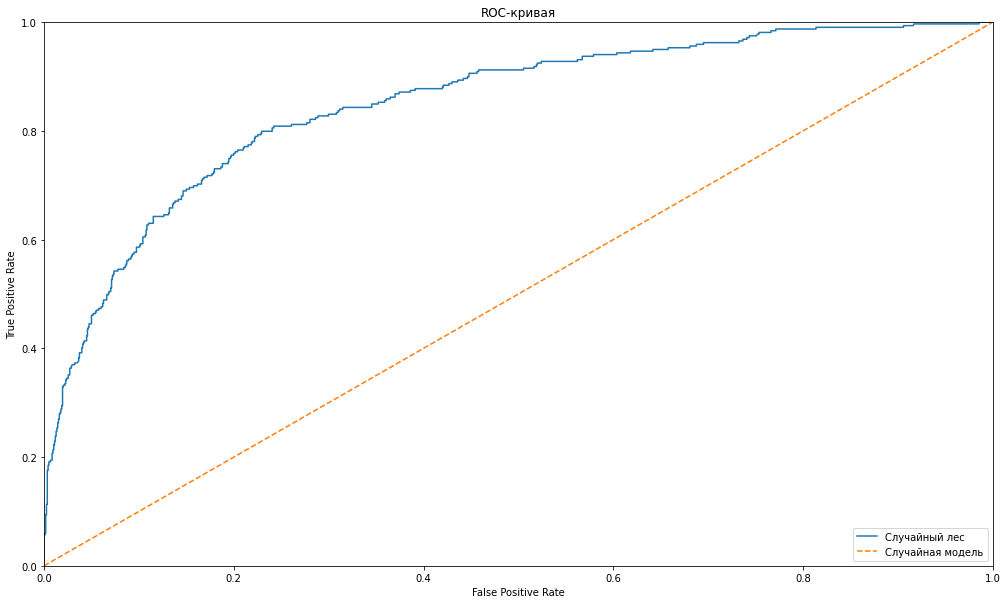

In [23]:
plt.figure(figsize=[17,10])

model = RandomForestClassifier(random_state = 12345, n_estimators = 14, max_depth = 9, class_weight='balanced')
model.fit(features_train, target_train)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print(f"Случайный лес: AUC-ROC - {auc_roc}")
plt.plot(fpr, tpr, label='Случайный лес')

plt.plot([0, 1], [0, 1], linestyle='--', label='Случайная модель')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.title("ROC-кривая")
plt.show()

**При тестировании модели были выполнены следующие действия:**
- Была проверена на тестовой выборке модель случайного леса.
- Рассчитали значение F1-меры(0.6122448979591837) и AUC-ROC(0.8497593824902651) для случайного леса.
- Построили ROC-кривую для случайного леса.

# Общий вывод

**1 Подготовка данных**
- Ознакомились с датафреймом
- Проверили данные на дубликаты
- Найдены и заменены нулевым значением пропуски в столбце 'Tenure'
- Чтобы не попасть в дамми-ловушку, воспользовались функцией pd.get_dummies().

**2 Исследование задачи**
- Разделены данные на обучающую, валидационную и тестовую выборки
- Был обнаружен дисбаланс классов в отношении 4:1
- Обучили модели логистической регрессии, дерева решений, случайного леса с дисбалансом классов
- Нашли наилучшее значение F1-меры в моделях логистической регрессии(F1-мера - 0.09014084507042254), дерева решений(F1-мера - 0.5645756457564577), случайного леса(F1-мера - 0.5867768595041322) с дисбалансом классов
- Рассчитали значения AUC-ROC для логистической регрессии(AUC-ROC - 0.678176987912661), дерева решений(AUC-ROC - 0.7714941392651486), случайного леса(AUC-ROC - 0.8463021261375396) с дисбалансом классов.Наилучший показатель у случайного леса.
- Построили ROC-кривую для логистической регрессии, дерева решений и случайного леса с дисбалансом классов. Наилучшая ROC-кривая у случайного леса.

**3 Борьба с дисбалансом**
- Воспользовались техникой upsampling для борьбы с дисбалансом.Рассчитали F1-меру для логистической регрессии(F1-мера - 0.46105919003115264), дерева решений(F1-мера - 0.5515527950310558), случайного леса(F1-мера - 0.5907473309608541) с обработанными данными техникой upsampling.
- Воспользовались техникой downsampling для борьбы с дисбалансом.Рассчитали F1-меру для логистической регрессии(F1-мера - 0.45632065775950664), дерева решений(F1-мера - 0.5363636363636364), случайного леса(F1-мера - 0.5700365408038977) с обработанными данными техникой downsampling.
- Рассмотрели модели логистической регрессии, дерева решений, случайного леса с применением параметра class_weight для борьбы с дисбалансом.Рассчитали F1-меру для логистической регрессии(F1-мера - 0.4812030075187971), дерева решений(F1-мера - 0.5497512437810945), случайного леса(F1-мера - 0.5700365408038977) с применением параметра class_weight.
- Рассчитали значения AUC-ROC для логистической регрессии(AUC-ROC - 0.7705781008106463), дерева решений(AUC-ROC - 0.7608074790239481), случайного леса(AUC-ROC - 0.8463021261375396) с наилучшими показателями F1-меры.Наилучший показатель у случайного леса(AUC-ROC - 0.8463021261375396).
- Построили ROC-кривую для логистической регрессии, дерева решений и случайного леса с наилучшими показателями F1-меры. Наилучшая ROC-кривая у случайного леса.

**4 Тестирование модели**
- Была проверена на тестовой выборке модель случайного леса.
- Рассчитали значение F1-меры(0.6122448979591837) и AUC-ROC(0.8497593824902651) для случайного леса.
- Построили ROC-кривую для случайного леса.
- Параметры, дающие лучший результат: {n_estimators = 14, max_depth = 9}
- Лучше всего выравнивать через class_weight="balanced"